Minimale eisen
Je uitwerking van de data science pipeline moet uiteraard de onderzoeksvragen beantwoorden. Daarnaast moet het minimaal het volgende bevatten:

1. ~Een uitbreiding van de toegewezen dataset met een externe dataset.~(drugs dataset)

2. Een verkenning van de data met relevante statistische analyses.(alles hier onder)

3. Een interactieve visualisatie. (kaart: op spottingen en/of drugs gebruik , wordcloud)

4. Een correlatieonderzoek. ( onderzoeks vraag 3, in hoevere is er een verband in daytime en drugsverband en vorm)

5. Toepassing van een supervised machine learning techniek.(d.m.v. classification methode)

6. ~Toepassing van een unsupervised machine learning techniek.~ (onderzoeks vraag 3)

7. Een hypothesetoets met behulp van de Z-toets. (onbekent onderwerp)

# UFO's
## Introductie van de notebook 


wij behandelen de volgenden vragen in dit notebook

### 1. In hoeverre is er een verband tussen de vorm van de UFO en drugs gebruik per state?
We gaan opzoek naar meer informatie per state of stad om tekijken of er een duidelijk verband is tussen het gebruik van hallucinerende drugs en het spotten van ufo's

### 2 In hoeverre is er een verband tussen de vorm van de UFO en het land(state) van de waarneming?
Is er een verband van waar je bent van hoe het gespotten object er uit ziet

### ~3 Een vraag met correlatie onderzoek ツ~
### 3 Kunnen met behulp van clusteren groepen vinden tussen drugs gebruik en positie van spotingen per state
~is er een patroon te ontdekken tussen het dugs datatset en ufo dataset als we de data clusteren?~

We hebben niet echt een idee hoe we unsupervised learning kunnen toepassen nog 


Uit eindelijk willen een vorm van AI hebben waarmee je bijvoorbeeld maar de helft van een formulier invult en dan kan voorspellen vanuit welke plaats deze waarnemen was.



##Deze notebook is gemaakt door groep 1; Lucas van de horst, Richard Jansen, Max van Kemenade

## Notepad in notebook 😎

# Onderzoeksvragen

Matching input data (vorm/ state / jaar); ~ missing data compare


-- In hoeverre is er een verband tussen de vorm van de UFO en drugs gebruik per state?  ~ hypotese, mogelijk resultaat


~-- In hoeverre is er een verband tussen de vorm van de UFO en IQ per state?             ~ hypotese, weinig verband~


~-- In hoeverre is er een verband tussen de vorm van de UFO en inkomen per state?        ~ hypotese, weinig verband~


~-- In hoeverre is er een verband tussen UFO spottingen en sci-fi films?~


vindt een dataset voor drugs usage per state *note* hallucinate drug


~Dateset voor populaire sci-fi movies ~linken~


data set voor dag/nacht cyclus aan tijd ~ maybe

###Wat gaan we doen met data;


kijken naar welke periodes de meeste rapports zijn -> seisons, tijd, jaar


States gaan uitsorteren en mappen


Duur en vorm van sighting ~combi met drugs


duration(hours/minutes) kan weg (duplicate)


in hoevere is er een verband in daytime en drugsverband en vorm

vorm van de ufo voorspellen ivm drugs gebruik en daytime


Hier onder worden alle benodige libs ingeladen voor deze notebook

In [ ]:
import pandas as pd
import numpy as np

#import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import holoviews as hv

import requests
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

hv.extension('bokeh')

Output hidden; open in https://colab.research.google.com to view.

## 1# Data verkenning (Data collection)


Hieronder wordt het voorwerk gedaan met de data om een inzicht te krijgen over wat we hebben



In [ ]:
ufo_csv_url = "https://raw.githubusercontent.com/Lucas-vdr-Horst/ufo-observations-ai/master/ufo.csv"
ufo = pd.read_csv(ufo_csv_url, low_memory=False)

## Index verplaatsen

In [ ]:
ufo.set_index('Unnamed: 0', inplace=True)


## De ingelezen data bekijken en beoordelen

In [ ]:
ufo.head()
print(ufo.dtypes)

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
visit (seconds)           int64
dtype: object


In [ ]:
ufo.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88679 entries, 0 to 88678
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  string 
 1   city                  88679 non-null  string 
 2   state                 81270 non-null  string 
 3   country               76314 non-null  string 
 4   shape                 85757 non-null  string 
 5   duration (seconds)    88677 non-null  string 
 6   duration (hours/min)  85660 non-null  string 
 7   comments              88644 non-null  string 
 8   date posted           88679 non-null  string 
 9   latitude              88679 non-null  string 
 10  longitude             88679 non-null  float64
 11  visit (seconds)       88679 non-null  Int64  
dtypes: Int64(1), float64(1), string(10)
memory usage: 8.9 MB


## Missing data controleren (Data cleaning)

In [29]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

dfCleaned = ufo.copy()

dfCleaned['datetime'] = dfCleaned['datetime'].str.replace('24:00', '00:00')
dfCleaned['datetime']= pd.to_datetime(dfCleaned['datetime'], format="%m/%d/%Y %H:%M") 

dfCleaned['state']  = dfCleaned['state'].fillna('NotUs')
#le.fit(dfCleaned['state'])
#dfCleaned['state_int'] = le.transform(dfCleaned['state'])

dfCleaned['country']  = dfCleaned['country'].fillna('Missing_Info')

dfCleaned['shape'] = dfCleaned['shape'].fillna('?')
#le.fit(dfCleaned['shape'])
#dfCleaned['shape_int'] = le.transform(dfCleaned['shape'])

dfCleaned['date posted']= pd.to_datetime(dfCleaned['date posted'], format="%m/%d/%Y") 

dfCleaned['latitude'] = dfCleaned['latitude'].str.replace('33q.200088', '33.200088')
dfCleaned['latitude'] = dfCleaned.latitude.astype(float)

dfCleaned['duration (seconds)'] = dfCleaned['duration (seconds)'].str.replace('`', '') # 2 waardens hebben dit, ez fix
dfCleaned['duration (seconds)']  = dfCleaned['duration (seconds)'].fillna('0') # 2 waardens hebben een nan, liever wil ik drop rows doen
dfCleaned['duration (seconds)'] = dfCleaned['duration (seconds)'].astype(float)

dfCleaned = dfCleaned.drop(columns=['duration (hours/min)', 'comments'])
#dfCleaned = dfCleaned[['datetime', 'city','state','state_int','country','shape','shape_int','duration (seconds)','date posted', 'latitude','longitude', 'visit (seconds)']]
dfCleaned = dfCleaned[['datetime', 'city','state','country','shape','duration (seconds)','date posted', 'latitude','longitude', 'visit (seconds)']]

In [30]:
dfCleaned = dfCleaned.convert_dtypes()
dfCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88679 entries, 0 to 88678
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            88679 non-null  datetime64[ns]
 1   city                88679 non-null  string        
 2   state               88679 non-null  string        
 3   country             88679 non-null  string        
 4   shape               88679 non-null  string        
 5   duration (seconds)  88679 non-null  float64       
 6   date posted         88679 non-null  datetime64[ns]
 7   latitude            88679 non-null  float64       
 8   longitude           88679 non-null  float64       
 9   visit (seconds)     88679 non-null  Int64         
dtypes: Int64(1), datetime64[ns](2), float64(3), string(4)
memory usage: 7.5 MB


| variable    | meetniveau |
|-------------|------------|
| datetime    | Continu    |
| city        | Nominaal   |
| state       | Nominaal   |
| country     | Nominaal   |
| shape       | Nominaal   |
| duration    | Continu    |
| comments    | Continu    |
| date posted | Nominaal   |
| latitude    | Continu    |
| longitude   | Continu    |
| visit       | Continu    |

In [31]:
dfCleaned.isnull().sum()

datetime              0
city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
date posted           0
latitude              0
longitude             0
visit (seconds)       0
dtype: int64

In [ ]:
#TODO, Haal de NaN values er uit
ufo.isnull().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
visit (seconds)             0
dtype: int64

In [ ]:
ufo = ufo.fillna("?")

In [ ]:
ufo.isnull().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
visit (seconds)         0
dtype: int64

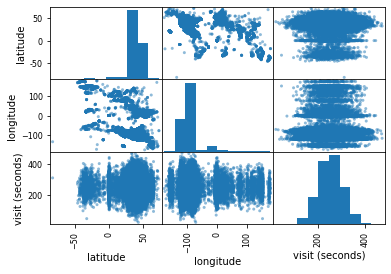

In [ ]:
pd.plotting.scatter_matrix(ufo)
plt.show()

In [ ]:
min_date, max_date = ufo['date posted'].min(), ufo['date posted'].max()
amount_steps = 10
step_size = (max_date - min_date) / amount_steps

def step_to_timerange(step):
  return min_date + step_size*step, min_date + step_size*(step+1)

def time_slice(start_time, end_time):
  mask = (ufo['date posted'] > start_time) & (ufo['date posted'] <= end_time)
  return hv.Scatter(zip(ufo.loc[mask]['longitude'], ufo.loc[mask]['latitude']))

scatter_dict = {step_to_timerange(i)[0]:time_slice(*step_to_timerange(i)) for i in range(amount_steps)}

hv.extension('bokeh')
world_plot = hv.HoloMap(scatter_dict)
world_plot.opts(width=600, height=300)

Output hidden; open in https://colab.research.google.com to view.

### Trend vinden van de date time

[2011  102   41 ...   31  147 1220]


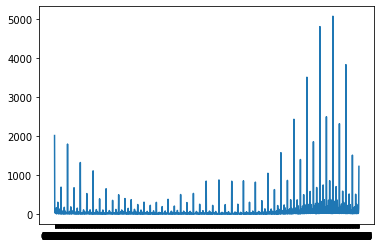

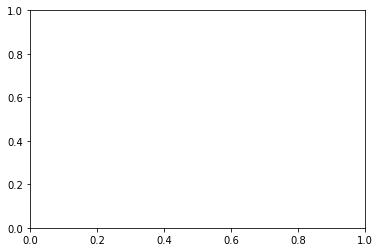

In [ ]:
type(ufo['datetime'][1])
#print(ufo['datetime'][1][-5:])

date = np.array(ufo['datetime'])
dateEdit = np.array([])
count =0
for i in date:
    date[count] =  date[count][-5:]
    count +=1

#print(np.unique(date, return_counts=True))
df = np.unique(date, return_counts=True)
print(df[1])
x= df[0]
y= df[1]
fig, ax1 = plt.subplots()
ax1.plot(x,y)

dateEdit = date[:100]
fig, ax = plt.subplots()
#ax.hist(dateEdit)

plt.show()

### years visualiseren

In [ ]:
# TODO, grafiek uitzetten van de jaren en rapports

### Shapes onderzoeken

In [ ]:
#ufo.head()
ufo['shape'].unique()


array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', '?', 'delta', 'changing', 'egg', 'flash',
       'diamond', 'cross', 'teardrop', 'cone', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome', 'changed'], dtype=object)

In [ ]:
ufo['shape'].value_counts()

light        17872
triangle      8489
circle        8453
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
?             2922
formation     2657
cigar         2241
changing      2140
flash         1472
rectangle     1418
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
round            2
crescent         2
dome             1
pyramid          1
changed          1
flare            1
hexagon          1
Name: shape, dtype: int64

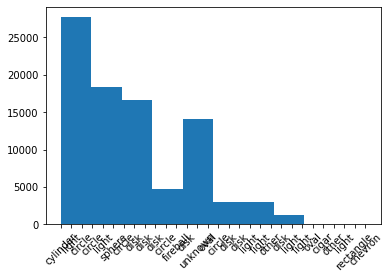

In [ ]:
#df = pd.DataFrame({'count': ufo['shape'].value_counts()})

#print((ufo['shape'].value_counts()))
#print(df)
#ax.hist(ufo['shape'].value_counts(), alpha=1)
#x= len(ufo['shape'].unique())
#y= ufo['shape'].value_counts()

fig, ax = plt.subplots()

x= np.array(ufo['shape'].unique())
y= np.array(ufo['shape'].value_counts())

df = pd.DataFrame({'shape': x,'count': y}) #shape heeft 1 meer index??
#df2= pd.DataFrame({'shape': x})
#print(df)
#print(df2)
#df2 = df2[:-1] # Remove last index
#print(df2)
#print(df)
#ax.hist(x)
ax.hist(ufo['shape'])
ax.set_xticklabels(ufo['shape'],rotation = 45)

#TODO Make Labels better

plt.show()

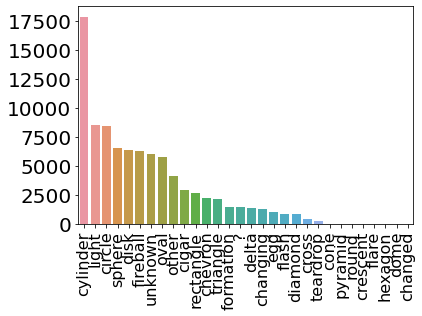

In [ ]:
sns.barplot(x, y)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)
plt.show()

### City en States uitzoeken

In [ ]:
ufo['country'].unique()

array(['us', '?', 'gb', 'ca', 'au', 'de'], dtype=object)

In [ ]:
city = ufo['city'].value_counts().index

In [ ]:
ufo['city'].unique()

array(['san marcos', 'lackland afb', 'chester (uk/england)', ...,
       'calmar (canada)', 'aleksandrow (poland)', 'hamstead (hollyridge)'],
      dtype=object)

In [ ]:
ufo['country'].describe()

count     88679
unique        6
top          us
freq      70293
Name: country, dtype: object

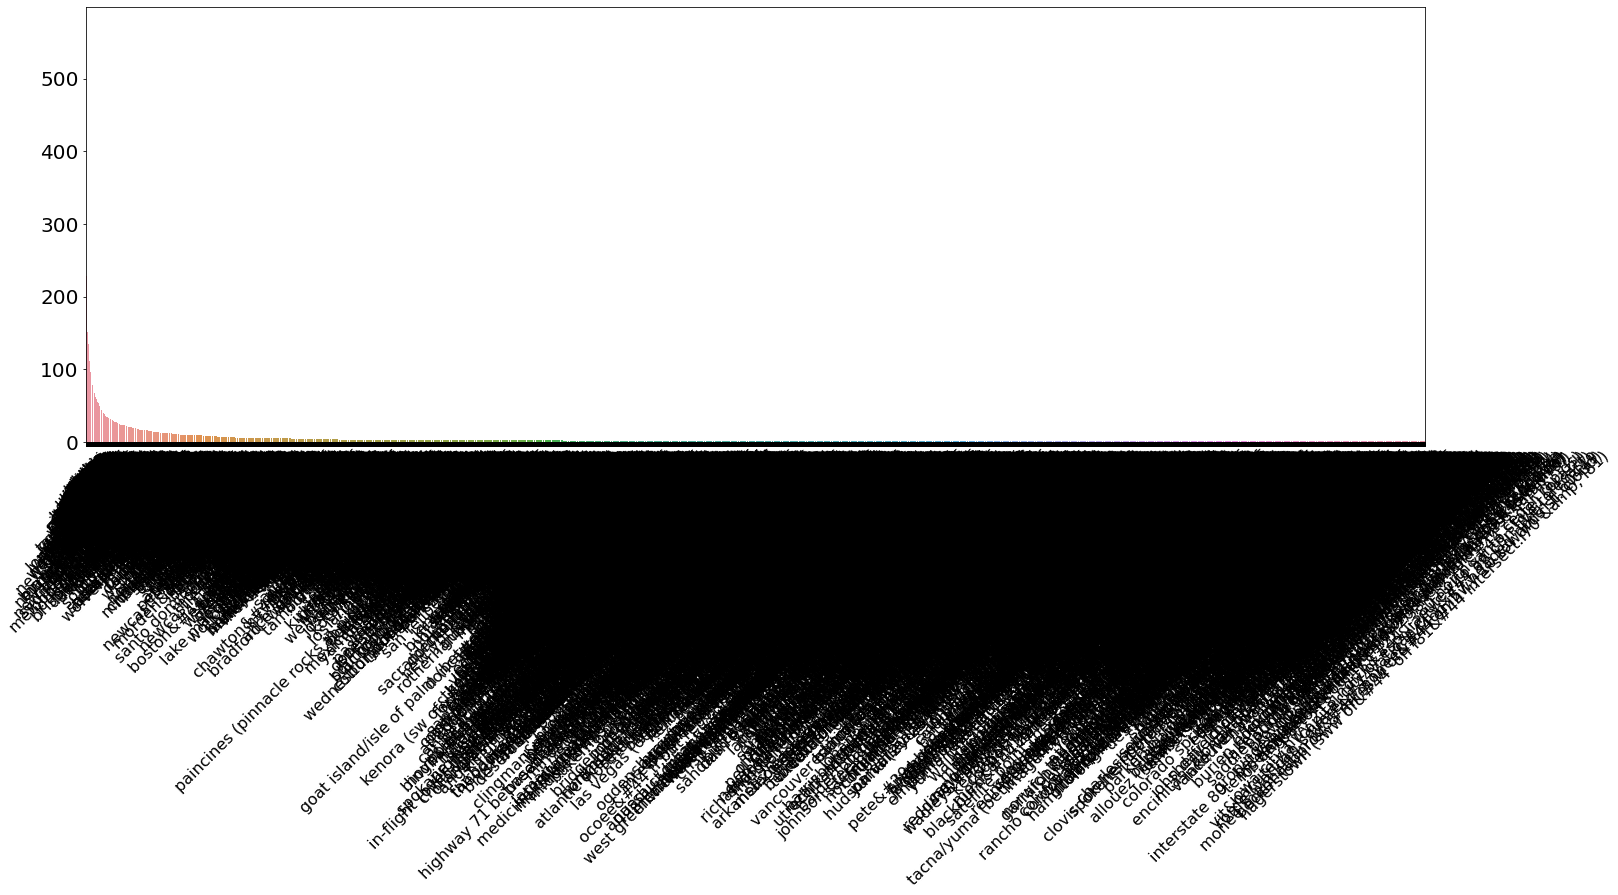

In [ ]:
city = ufo['city'].value_counts().index
city_count = ufo['city'].value_counts().values


plt.subplots(figsize=(24,8))
sns.barplot(city, city_count)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

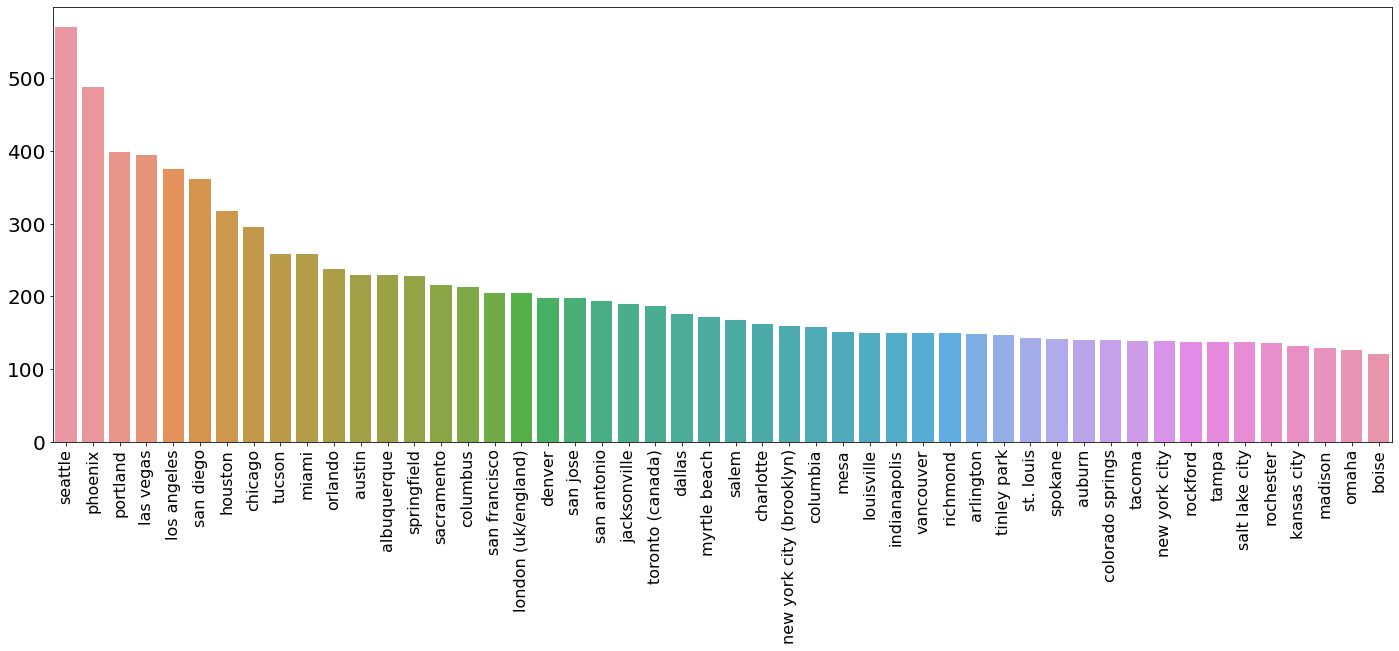

In [ ]:
plt.subplots(figsize=(24,8))
sns.barplot(city[:50], city_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
ufo['country'].count()

88679

In [ ]:
ufo['country'].value_counts()

us    70293
?     12365
ca     3266
gb     2050
au      593
de      112
Name: country, dtype: int64

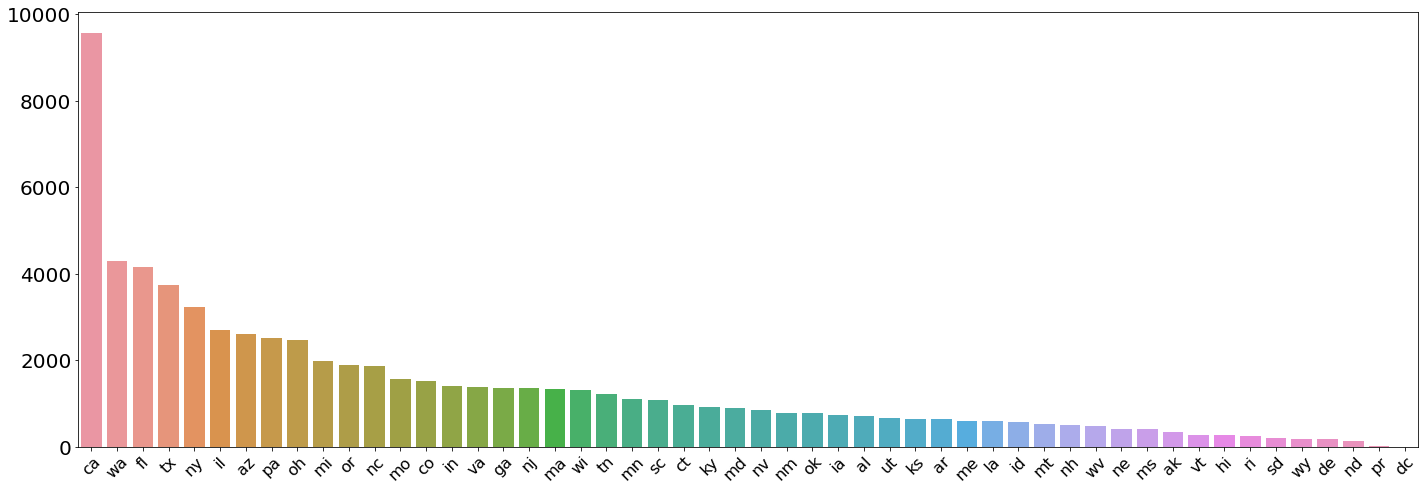

In [ ]:
states_us = ufo[ufo.country == "us"]["state"].value_counts().index
states_ratio = ufo[ufo.country == "us"]["state"].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(states_us, states_ratio)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

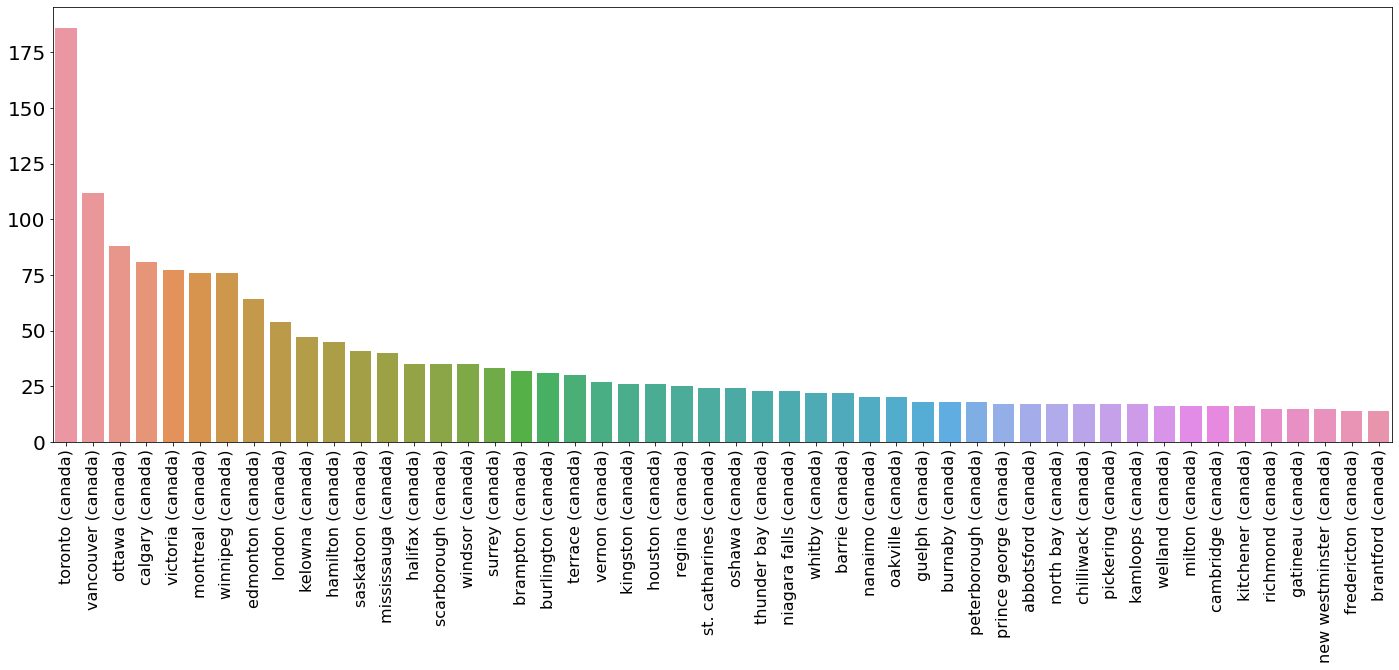

In [ ]:
canada = ufo[ufo.country == "ca"]['city'].value_counts().index
canada_count = ufo[ufo.country == "ca"]['city'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(canada[:50], canada_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

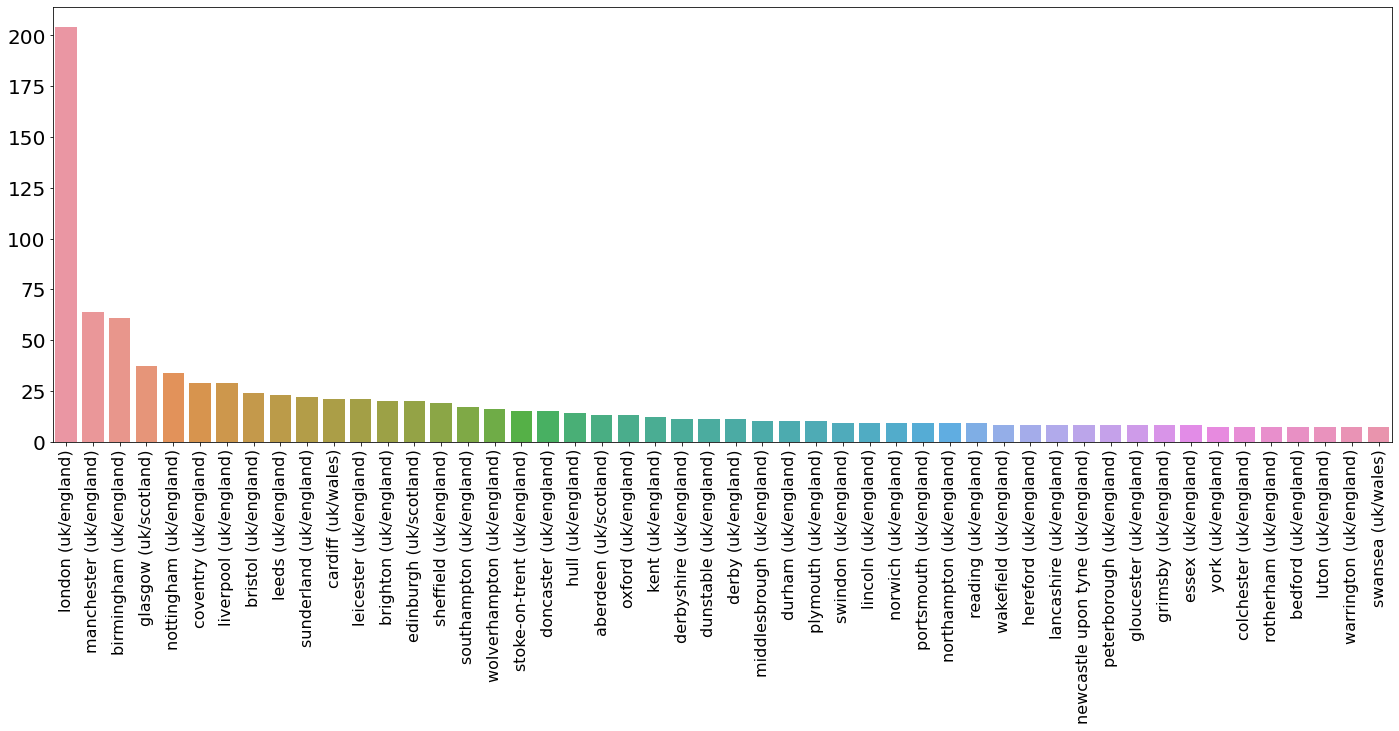

In [ ]:
england = ufo[ufo.country == "gb"]['city'].value_counts().index
england_count = ufo[ufo.country == "gb"]['city'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(england[:50], england_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

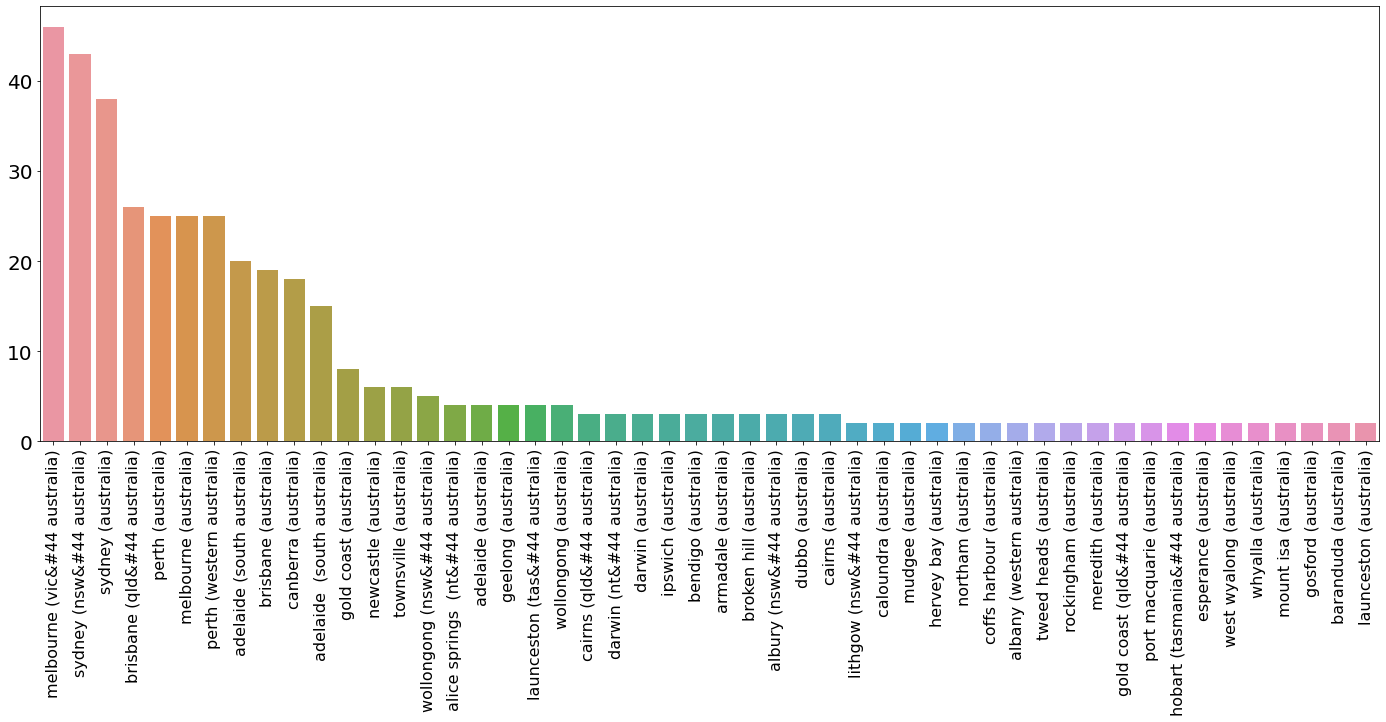

In [ ]:
australia = ufo[ufo.country == "au"]['city'].value_counts().index
australia_count = ufo[ufo.country == "au"]['city'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(australia[:50], australia_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

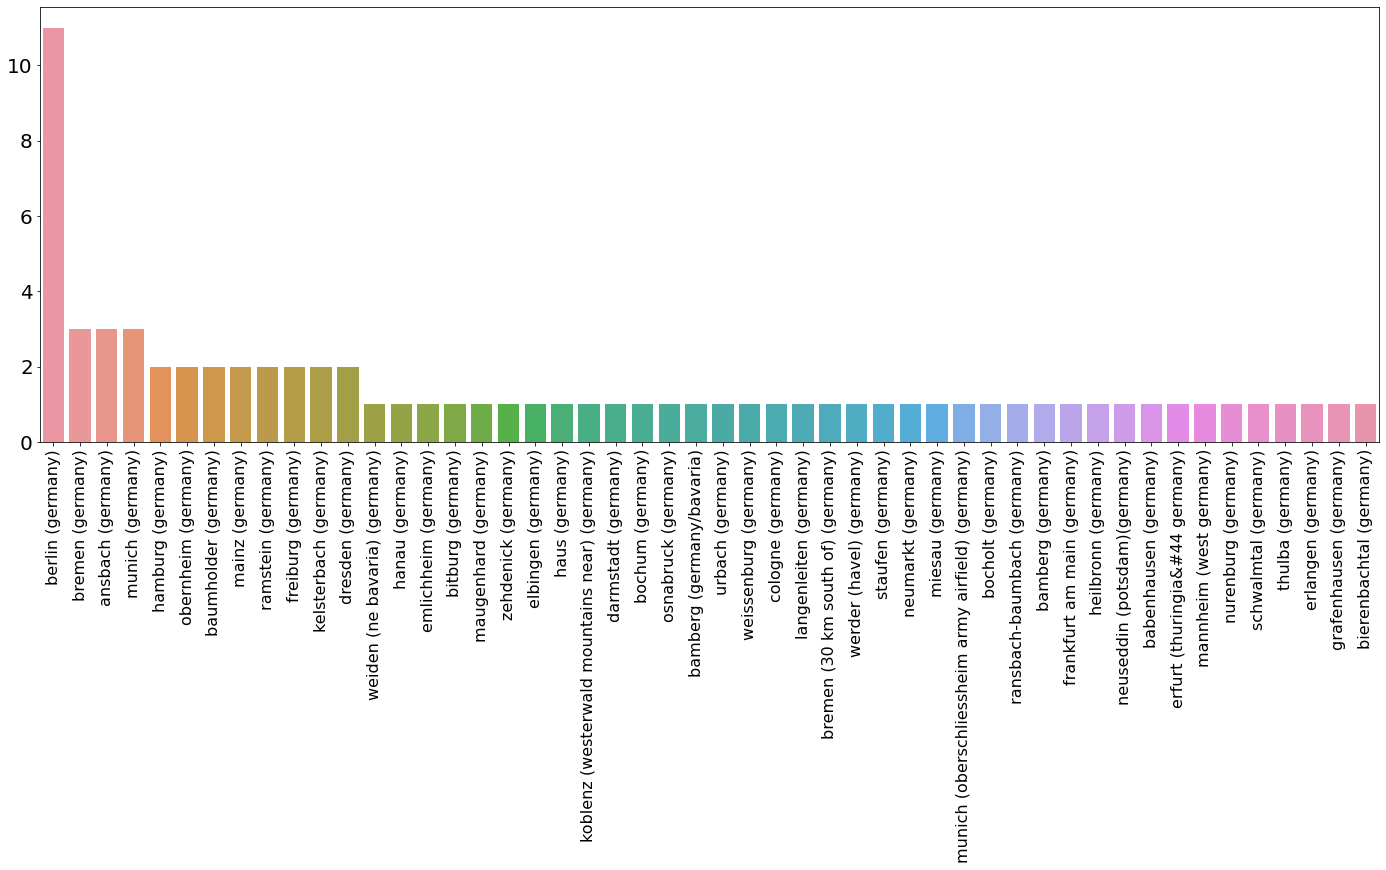

In [ ]:
germany = ufo[ufo.country == "de"]['city'].value_counts().index
germany_count = ufo[ufo.country == "de"]['city'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(germany[:50], germany_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

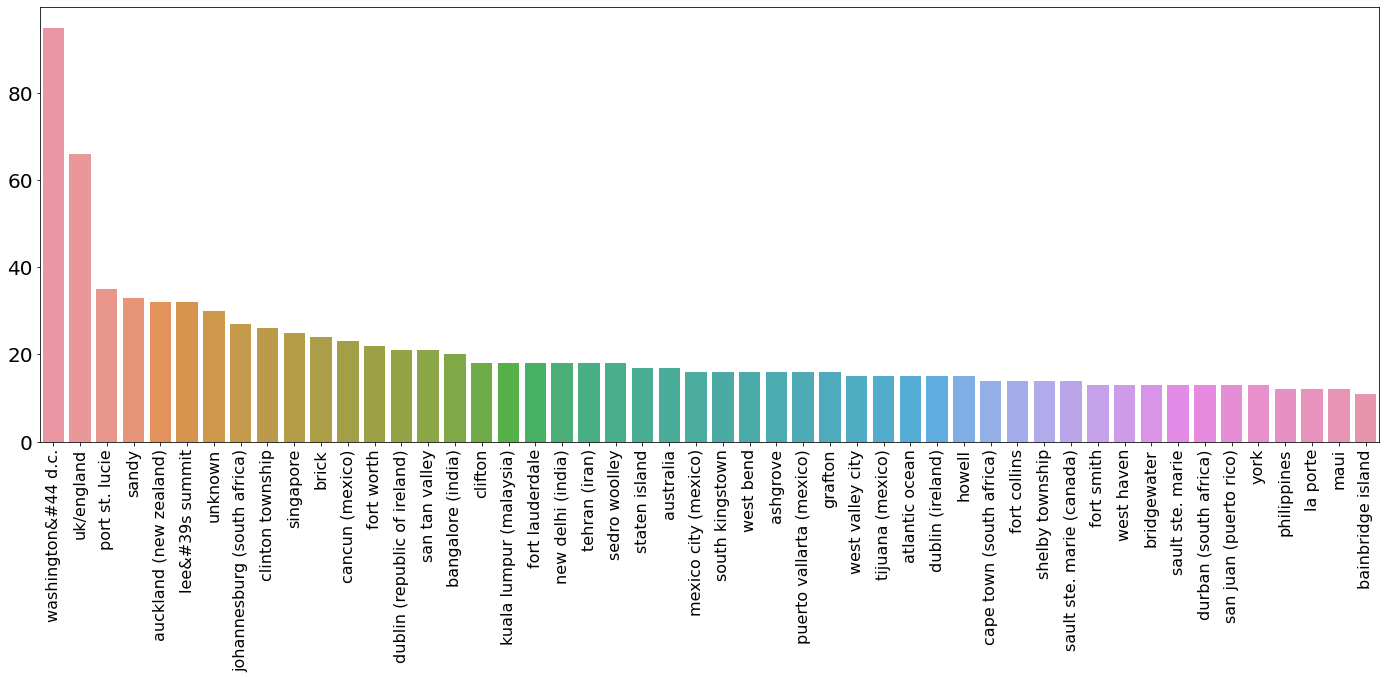

In [ ]:
unk = ufo[ufo.country == "?"]['city'].value_counts().index
unk_count = ufo[ufo.country == "?"]['city'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(unk[:50], unk_count[:50])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

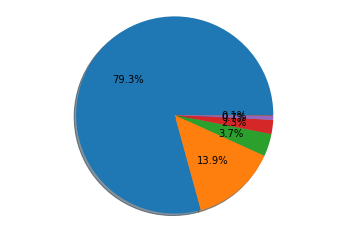

In [ ]:
fig1, ax1 = plt.subplots()
labels = np.array(ufo['country'].unique())
ax1.pie(ufo['country'].value_counts(),autopct='%1.1f%%', shadow=True, startangle=0)
#ax1.pie(ufo['country'].value_counts())

#TODO make labels

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Overzicht van spottingen per land

In [ ]:
image_url = "https://raw.githubusercontent.com/Gommy111/ufo-observations-ai/master/ufo.png"
ufo_mask = np.array(Image.open(BytesIO(requests.get(image_url).content)))
ufo_mask[ufo_mask < 200] = 0
ufo_mask[ufo_mask >= 200] = 255

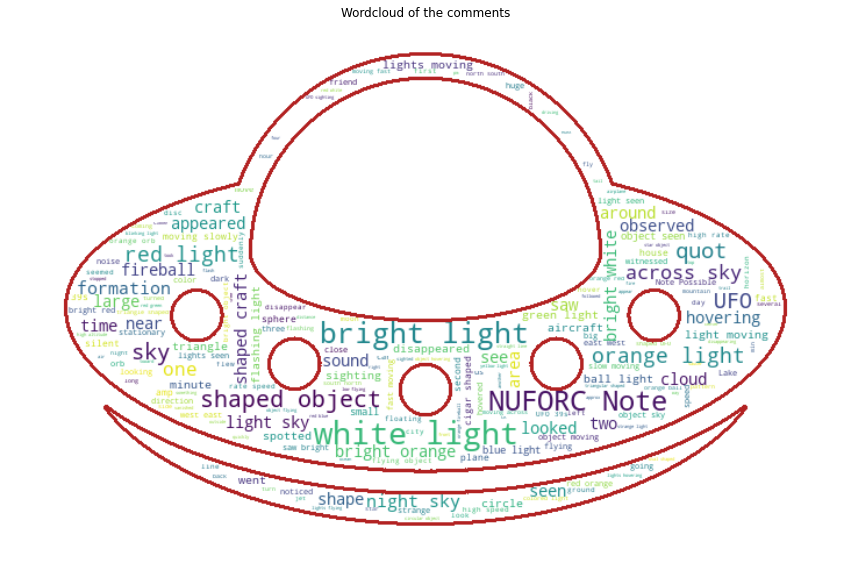

In [ ]:
text = "".join(ufo['comments'].astype(str))
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    max_words=200,
    background_color="white",
    mask=ufo_mask,
    contour_width=2,
    contour_color='firebrick'
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of the comments")
plt.show()

## Data cleanen

### verwijderen van onnodige data

### Externe Data Set toevoegen

In [ ]:
#TODO, Code voor states data

Source van externe dataset
https://pdas.samhsa.gov/saes/state#age-chart-tab

In [ ]:
marijuana_csv_url = "https://raw.githubusercontent.com/Lucas-vdr-Horst/ufo-observations-ai/master/MarijuanaUS.csv"
df2 = pd.read_csv(marijuana_csv_url)

In [ ]:
df2.head()

,outcome,age_group,year_pair,state,estimate,ci_lower,ci_upper
0,Marijuana Use in the Past Month,12 or Older,2002-03,Alabama,0.043155,0.034499,0.053862
1,Marijuana Use in the Past Month,12 or Older,2002-03,Alaska,0.097837,0.081030,0.117682
2,Marijuana Use in the Past Month,12 or Older,2002-03,Arizona,0.056773,0.046052,0.069807
3,Marijuana Use in the Past Month,12 or Older,2002-03,Arkansas,0.056341,0.046335,0.068353
4,Marijuana Use in the Past Month,12 or Older,2002-03,California,0.065032,0.058173,0.072637


In [ ]:
df2.isnull().sum()

outcome      0
age_group    0
year_pair    0
state        0
estimate     0
ci_lower     0
ci_upper     0
dtype: int64

In [ ]:
df2

,outcome,age_group,year_pair,state,estimate,ci_lower,ci_upper
0,Marijuana Use in the Past Month,12 or Older,2002-03,Alabama,0.043155,0.034499,0.053862
1,Marijuana Use in the Past Month,12 or Older,2002-03,Alaska,0.097837,0.081030,0.117682
2,Marijuana Use in the Past Month,12 or Older,2002-03,Arizona,0.056773,0.046052,0.069807
3,Marijuana Use in the Past Month,12 or Older,2002-03,Arkansas,0.056341,0.046335,0.068353
4,Marijuana Use in the Past Month,12 or Older,2002-03,California,0.065032,0.058173,0.072637
...,...,...,...,...,...,...,...
811,Marijuana Use in the Past Month,12 or Older,2017-18,Virginia,0.072740,0.063168,0.083632
812,Marijuana Use in the Past Month,12 or Older,2017-18,Washington,0.163950,0.144719,0.185182
813,Marijuana Use in the Past Month,12 or Older,2017-18,West Virginia,0.094153,0.079462,0.111231
814,Marijuana Use in the Past Month,12 or Older,2017-18,Wisconsin,0.088928,0.074252,0.106174


In [ ]:
df2.drop(columns=['outcome', 'age_group'])

,year_pair,state,estimate,ci_lower,ci_upper
0,2002-03,Alabama,0.043155,0.034499,0.053862
1,2002-03,Alaska,0.097837,0.081030,0.117682
2,2002-03,Arizona,0.056773,0.046052,0.069807
3,2002-03,Arkansas,0.056341,0.046335,0.068353
4,2002-03,California,0.065032,0.058173,0.072637
...,...,...,...,...,...
811,2017-18,Virginia,0.072740,0.063168,0.083632
812,2017-18,Washington,0.163950,0.144719,0.185182
813,2017-18,West Virginia,0.094153,0.079462,0.111231
814,2017-18,Wisconsin,0.088928,0.074252,0.106174


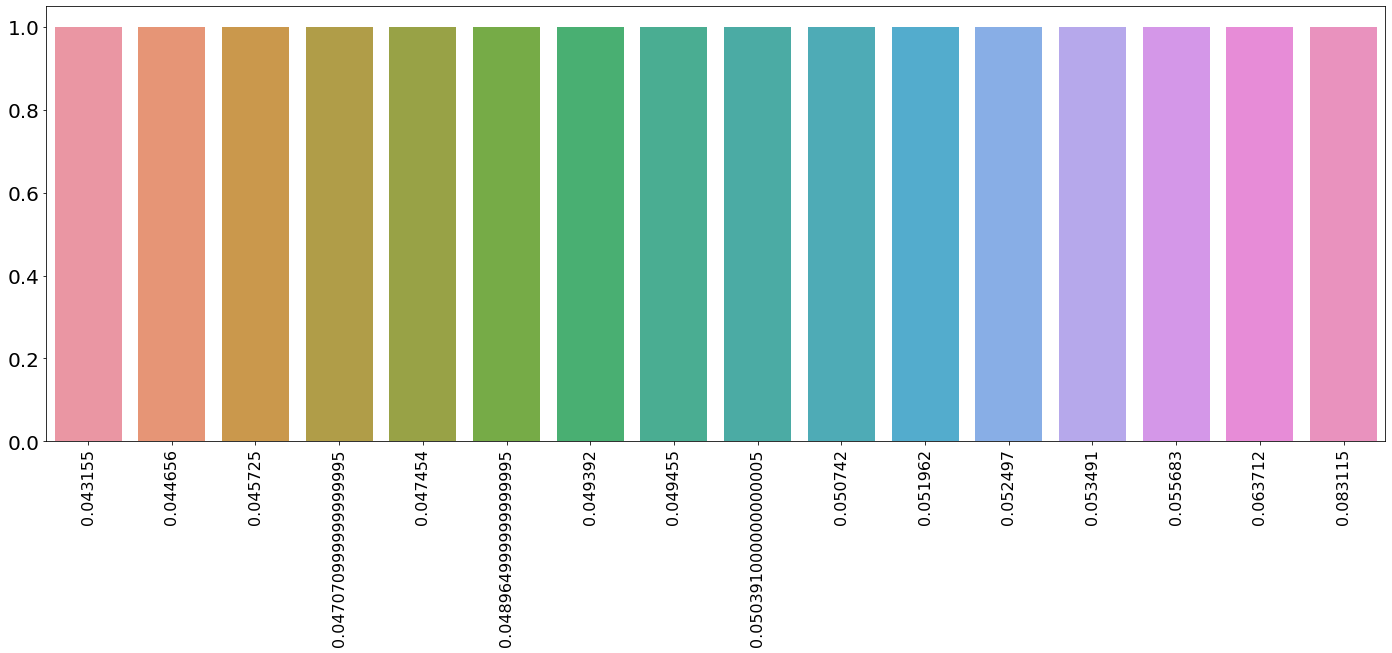

In [ ]:
state1Ind = df2[df2.state == "Alabama"]['estimate'].value_counts().index
state1Val = df2[df2.state == "Alabama"]['estimate'].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(state1Ind, state1Val)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
stateAlastdf2 =  df2[df2.state == "Alabama"]
stateCalstdf2 =  df2[df2.state == "California"]

In [ ]:
stateAlastdf2

,outcome,age_group,year_pair,state,estimate,ci_lower,ci_upper
0,Marijuana Use in the Past Month,12 or Older,2002-03,Alabama,0.043155,0.034499,0.053862
51,Marijuana Use in the Past Month,12 or Older,2003-04,Alabama,0.047071,0.038612,0.057273
102,Marijuana Use in the Past Month,12 or Older,2004-05,Alabama,0.048965,0.040357,0.059295
153,Marijuana Use in the Past Month,12 or Older,2005-06,Alabama,0.047454,0.038378,0.058545
204,Marijuana Use in the Past Month,12 or Older,2006-07,Alabama,0.044656,0.036230,0.054929
255,Marijuana Use in the Past Month,12 or Older,2007-08,Alabama,0.045725,0.037193,0.056101
306,Marijuana Use in the Past Month,12 or Older,2008-09,Alabama,0.050391,0.041515,0.061044
357,Marijuana Use in the Past Month,12 or Older,2009-10,Alabama,0.049392,0.039913,0.060980
408,Marijuana Use in the Past Month,12 or Older,2010-11,Alabama,0.051962,0.042605,0.063237
459,Marijuana Use in the Past Month,12 or Older,2011-12,Alabama,0.050742,0.041837,0.061421


(array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22]),
 <a list of 11 Text major ticklabel objects>)

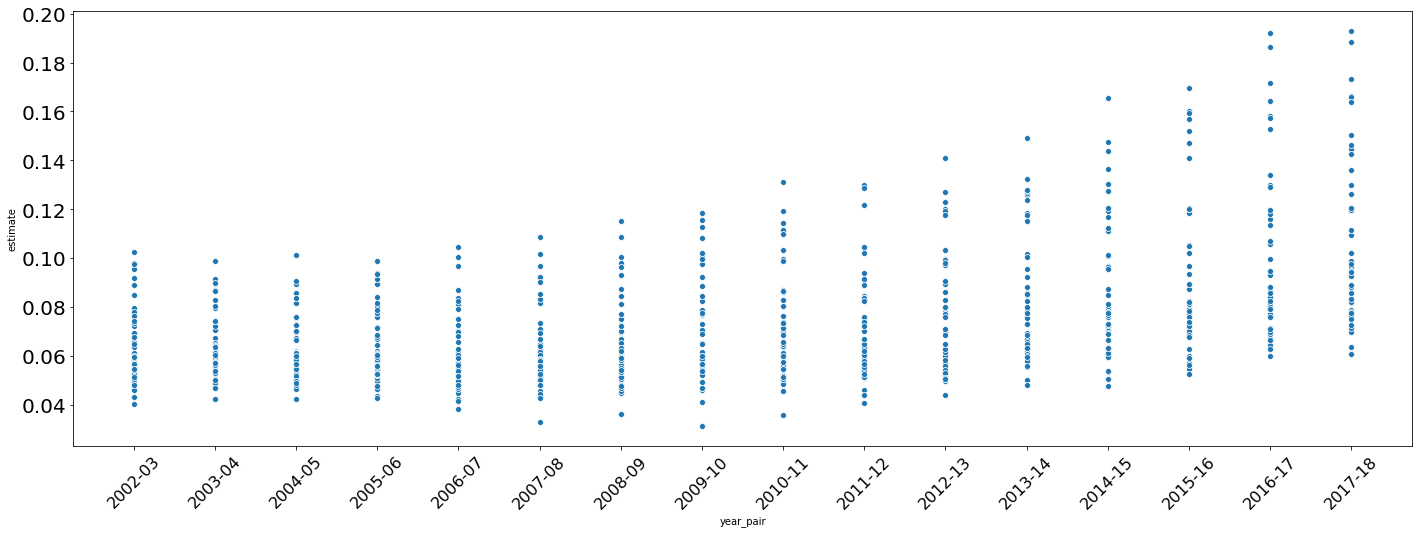

In [ ]:
plt.subplots(figsize=(24,8))
sns.scatterplot(data=df2, x="year_pair", y='estimate')
#sns.scatterplot(data=statestdf2, x="year_pair", y='estimate',hue="state")
#sns.scatterplot(data=stateCalstdf2, x="year_pair", y='estimate',hue="state")
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=20)

# KNN algortime


Hier passen wij het KNN algoritme toe om te voorspellen welke vorm de ufo heeft

In [34]:
from sklearn import datasets                               # Bevat de Iris-dataset
from sklearn.model_selection import train_test_split       # Opsplitsen Train/Test
from sklearn.linear_model import LinearRegression          # Lineaire regressie
from sklearn.cluster import KMeans                         # K-Means clustering
from sklearn.neighbors import KNeighborsClassifier         # K-NearestNeighbors classifier
from sklearn.metrics import accuracy_score                 # Meassuring accuracy
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [33]:
dfCleaned.dtypes

datetime              datetime64[ns]
city                          string
state                         string
country                       string
shape                         string
duration (seconds)           float64
date posted           datetime64[ns]
latitude                     float64
longitude                    float64
visit (seconds)                Int64
dtype: object

In [32]:
dfCleaned.head()

,datetime,city,state,country,shape,duration (seconds),date posted,latitude,longitude,visit (seconds)
Unnamed: 0,,,,,,,,,,
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,2004-04-27,29.883056,-97.941111,255
1,1949-10-10 21:00:00,lackland afb,tx,Missing_Info,light,7200.0,2005-12-16,29.384210,-98.581082,307
2,1955-10-10 17:00:00,chester (uk/england),NotUs,gb,circle,20.0,2008-01-21,53.200000,-2.916667,280
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,2004-01-17,28.978333,-96.645833,202
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,2004-01-22,21.418056,-157.803611,255


In [37]:
dfKNN = dfCleaned.copy()
dfKNN = dfKNN.drop(columns=['datetime','city','state','country','shape','date posted'])
#dfKNN = dfKNN.drop(columns=['datetime','datetime','city','state','country','date posted','shape','duration (seconds)', 'duration (hours/min)','comments','visit (seconds)','latitude'])

In [38]:
dfKNN.head()

,duration (seconds),latitude,longitude,visit (seconds)
Unnamed: 0,,,,
0,2700.0,29.883056,-97.941111,255
1,7200.0,29.384210,-98.581082,307
2,20.0,53.200000,-2.916667,280
3,20.0,28.978333,-96.645833,202
4,900.0,21.418056,-157.803611,255


In [39]:
dfKNN.dtypes


duration (seconds)    float64
latitude              float64
longitude             float64
visit (seconds)         Int64
dtype: object

In [40]:
import copy
def combinations(target,data):
    
    for i in range(len(data)):
        new_target = copy.copy(target)
        new_data = copy.copy(data)
        new_target.append(data[i])
        new_data = data[i+1:]
        print(new_target)
        combolst.append(new_target)
        combinations(new_target,new_data)
                    
target = []
data = list(dfKNN.columns)
combolst = []
combinations(target,data)

['duration (seconds)']
['duration (seconds)', 'latitude']
['duration (seconds)', 'latitude', 'longitude']
['duration (seconds)', 'latitude', 'longitude', 'visit (seconds)']
['duration (seconds)', 'latitude', 'visit (seconds)']
['duration (seconds)', 'longitude']
['duration (seconds)', 'longitude', 'visit (seconds)']
['duration (seconds)', 'visit (seconds)']
['latitude']
['latitude', 'longitude']
['latitude', 'longitude', 'visit (seconds)']
['latitude', 'visit (seconds)']
['longitude']
['longitude', 'visit (seconds)']
['visit (seconds)']


In [43]:
scoreFirm = 0.0
for i in range(1,5):
    for data in combolst:
        print(data)
        x = dfKNN['latitude']
        y = ufo['shape']

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

        knn = KNeighborsClassifier()

        knn.set_params(n_neighbors = i, weights = 'distance', algorithm = 'brute',leaf_size = 30)

        knn.fit(x_train,y_train)

        y_pred = knn.predict(x_test)
        accuracy_score(y_test, y_pred)

        score = knn.score(x_test,y_test)
        if score > scoreFirm:
            scoreFirm = score
            print(knn.score(x_test,y_test))
            print(data)
            print("k =", i)

['duration (seconds)']


ValueError: ignored

dit is een placeholder

nog meerr
